In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [41]:
# Example: loading data from a CSV file
data = pd.read_csv('Synthetic_Financial_datasets_log.csv')

In [ ]:
# @title Default title text
print(data.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB
None


In [ ]:
print(data.describe())


               step        amount  oldbalanceOrg  newbalanceOrig  \
count  42271.000000  4.227100e+04   4.227100e+04    4.227100e+04   
mean       7.171087  1.490108e+05   7.727734e+05    7.874065e+05   
std        2.118037  3.145005e+05   2.284003e+06    2.321941e+06   
min        1.000000  1.770000e+00   0.000000e+00    0.000000e+00   
25%        7.000000  7.031875e+03   0.000000e+00    0.000000e+00   
50%        8.000000  2.751283e+04   1.856733e+04    3.339900e+02   
75%        8.000000  1.794321e+05   1.421965e+05    1.500335e+05   
max        9.000000  1.000000e+07   2.854724e+07    2.861740e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    4.227000e+04    4.227000e+04  42270.000000         42270.0  
mean     8.450982e+05    1.158405e+06      0.002224             0.0  
std      2.466743e+06    2.960508e+06      0.047105             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00

In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


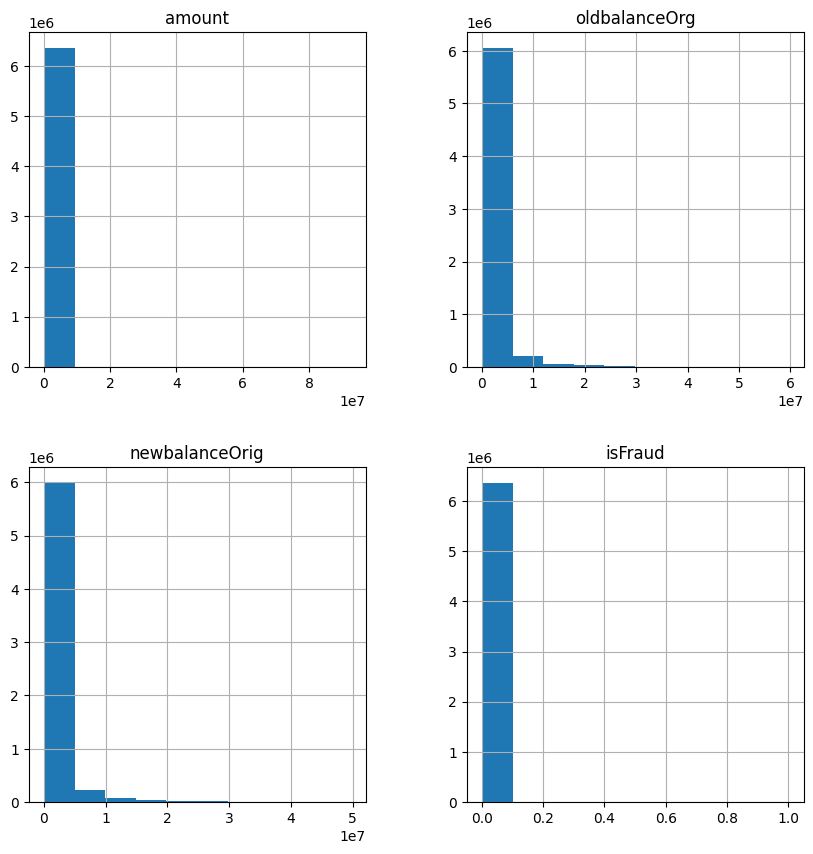

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','isFraud']
data[numerical_cols].hist(figsize=(10, 10))
plt.show()

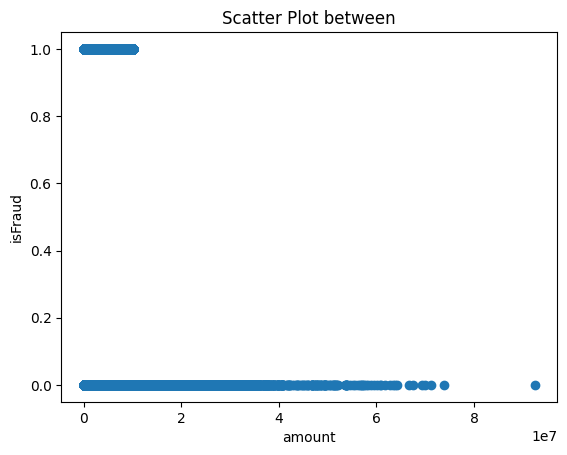

In [34]:
plt.scatter(data['amount'], data['isFraud'] )
plt.title('Scatter Plot between')
plt.xlabel('amount')
plt.ylabel('isFraud')
plt.show()

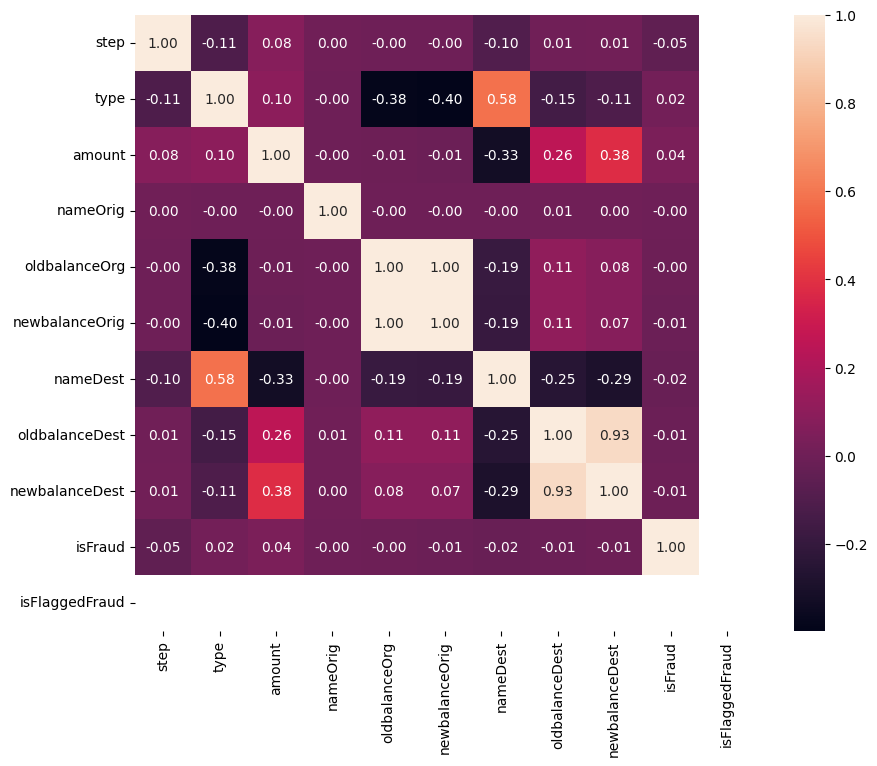

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()




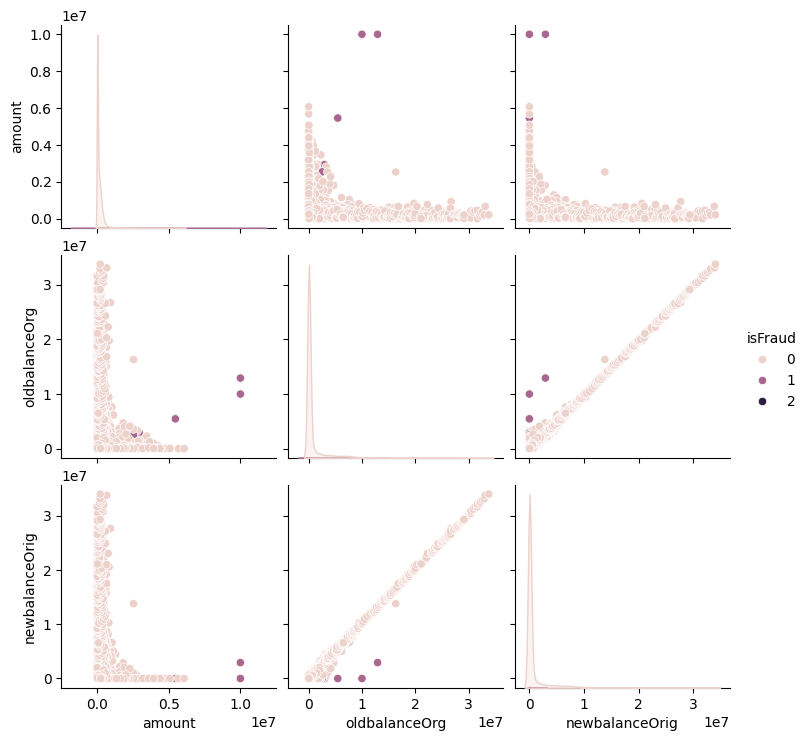

In [ ]:
# Pairplot for some features
sns.pairplot(data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']], hue='isFraud')
plt.show()

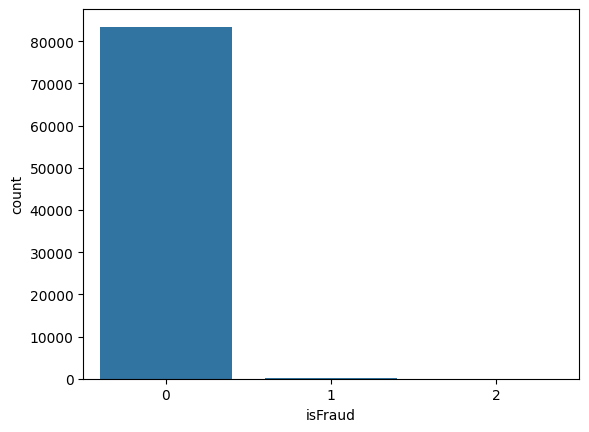

In [ ]:
# Distribution of target variable
sns.countplot(x='isFraud', data=data)
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('isFraud', axis=1))

# Create the final preprocessed DataFrame
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])
y = data['isFraud']

In [ ]:


# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




## LogisticRegression




In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9978708303761533
[[12653     0]
 [   27     1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12653
           1       1.00      0.04      0.07        28

    accuracy                           1.00     12681
   macro avg       1.00      0.52      0.53     12681
weighted avg       1.00      1.00      1.00     12681



## GaussianNB

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('isFraud', axis=1))

# Create the final preprocessed DataFrame
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])
y = data['isFraud']



# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.976105985332387
[[12373   280]
 [   23     5]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12653
           1       0.02      0.18      0.03        28

    accuracy                           0.98     12681
   macro avg       0.51      0.58      0.51     12681
weighted avg       1.00      0.98      0.99     12681



## DecisionTreeClassifier

In [47]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('isFraud', axis=1))

# Create the final preprocessed DataFrame
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])
y = data['isFraud']



# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

print('Decision Tree Accuracy:', accuracy)
print(conf_matrix)
print(class_report)

Decision Tree Accuracy: 0.9996364181212561
[[1906000     322]
 [    372    2092]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.87      0.85      0.86      2464

    accuracy                           1.00   1908786
   macro avg       0.93      0.92      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

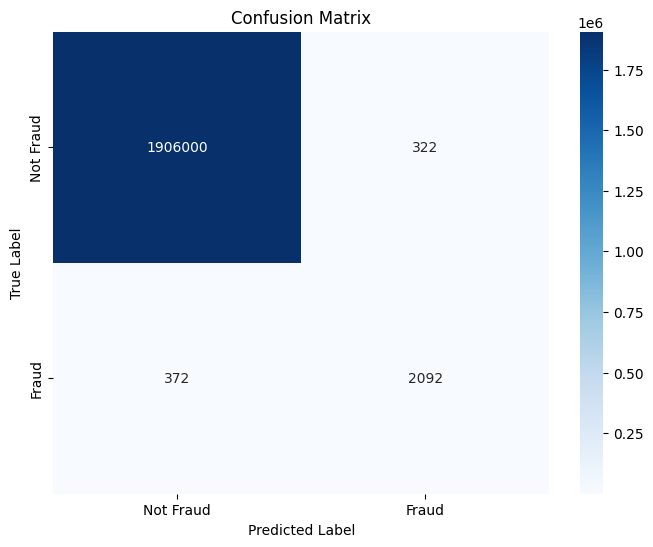

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

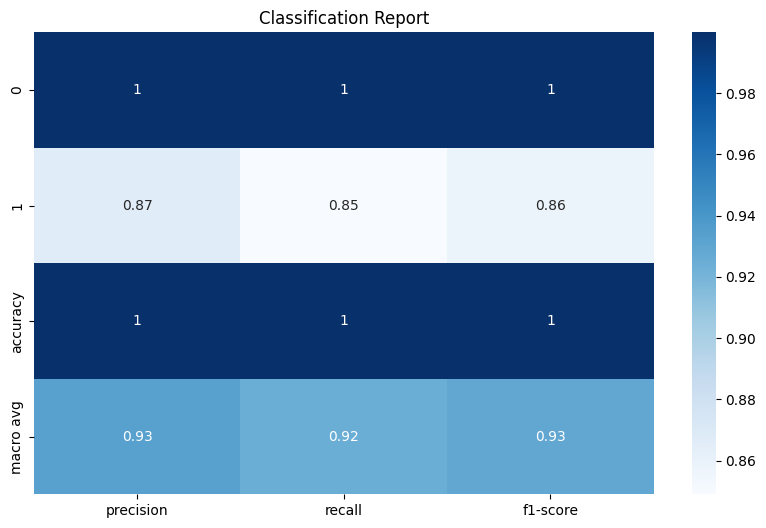

In [50]:
# Visualization of Classification Report
report_dict = classification_report(y_test, y_pred_dt, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

## K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('isFraud', axis=1))

# Create the final preprocessed DataFrame
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])
y = data['isFraud']



# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9976342559735036
[[12650     3]
 [   27     1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12653
           1       0.25      0.04      0.06        28

    accuracy                           1.00     12681
   macro avg       0.62      0.52      0.53     12681
weighted avg       1.00      1.00      1.00     12681



## Sequential Model (Neural Network)

In [ ]:
# Sequential Model (Neural Network)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('isFraud', axis=1))

# Create the final preprocessed DataFrame
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])
y = data['isFraud']



# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test)


Epoch 1/50
2959/2959 [==============================] - 10s 3ms/step - loss: 0.0236 - accuracy: 0.9963 - val_loss: 0.0125 - val_accuracy: 0.9978
Epoch 2/50
2959/2959 [==============================] - 9s 3ms/step - loss: 0.0118 - accuracy: 0.9978 - val_loss: 0.0121 - val_accuracy: 0.9979
Epoch 3/50
2959/2959 [==============================] - 10s 3ms/step - loss: 0.0105 - accuracy: 0.9979 - val_loss: 0.0121 - val_accuracy: 0.9979
Epoch 4/50
2959/2959 [==============================] - 8s 3ms/step - loss: 0.0102 - accuracy: 0.9979 - val_loss: 0.0108 - val_accuracy: 0.9979
Epoch 5/50
2959/2959 [==============================] - 10s 3ms/step - loss: 0.0098 - accuracy: 0.9980 - val_loss: 0.0110 - val_accuracy: 0.9979
Epoch 6/50
2959/2959 [==============================] - 9s 3ms/step - loss: 0.0093 - accuracy: 0.9980 - val_loss: 0.0106 - val_accuracy: 0.9981
Epoch 7/50
2959/2959 [==============================] - 9s 3ms/step - loss: 0.0090 - accuracy: 0.9980 - val_loss: 0.0108 - val_accura

In [ ]:
print('Neural Network Accuracy:', accuracy)


Neural Network Accuracy: 0.998028576374054
